# This requires different from django backend packages!

In [1]:
import torch

torch.cuda.is_available()

True

In [2]:
from PIL import Image, ImageDraw, ImageFont, ImageChops, ImageOps

from pathlib import Path

import numpy as np

In [3]:
# this is for testing purposes!
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import img_tools as img_t

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
data_path = Path("dataset")

In [7]:
for folder in data_path.iterdir():
    folder_path = data_path / folder
    print(folder_path)

dataset\dataset\Affectionately Yours - TTF
dataset\dataset\akaDora
dataset\dataset\beneg___
dataset\dataset\fabfeltscript-bold
dataset\dataset\GreatVibes-Regular
dataset\dataset\I Love Glitter
dataset\dataset\Monallesia Script
dataset\dataset\Quirlycues
dataset\dataset\SFCartoonistHand


(128, 128)
120


C:\Users\theio\AppData\Local\Temp\ipykernel_6272\3624130935.py:16: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  display(tst.rotate(-7, resample=Image.BILINEAR))


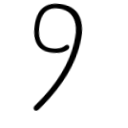

(128, 128)


In [151]:
test_image_path = Path("dataset", "Quirlycues", "9.png")
with Image.open(test_image_path) as img:
    # display(img)
    print(img.size)
    initial_size = img.size
    tst = ImageChops.offset(img, xoffset=-10, yoffset=-5)
    # display(tst)
    
    scale = 0.95
    new_size = int(img.size[0]*scale)//2*2
    print(new_size)
    tst = ImageOps.pad(tst, size=(new_size, new_size))
    temp = (img.size[0] - tst.size[0])//2
    tst = ImageOps.expand(tst, border=temp)
    
    display(tst.rotate(-7, resample=Image.BILINEAR))
    print(tst.size)

In [159]:
r, g, b, a = tst.split()

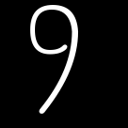

In [162]:
a

In [9]:
test_image_path = Path("dataset", "Quirlycues", "9.png")
with Image.open(test_image_path) as img:
    ans = img_t.augmentation([img], scale_arr=[1, 0.75], translation_arr=[0, 10], rotate_arr=[0, -20])
print(ans.shape)

(16, 128, 128)


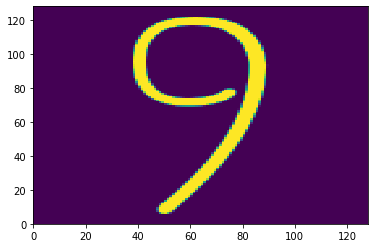

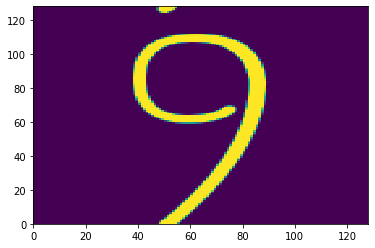

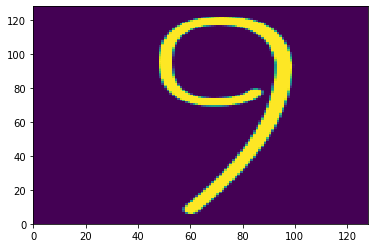

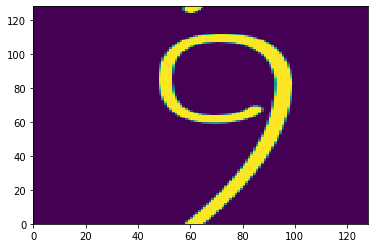

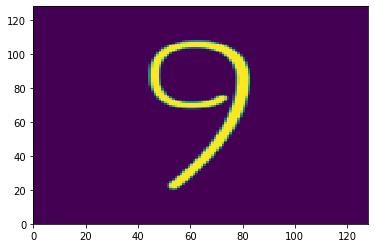

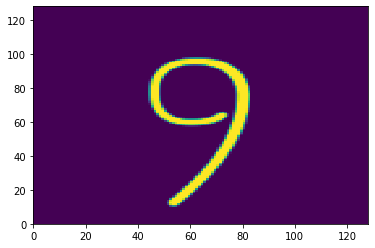

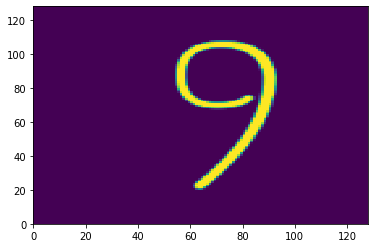

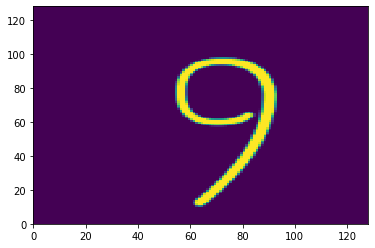

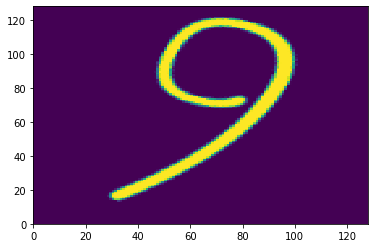

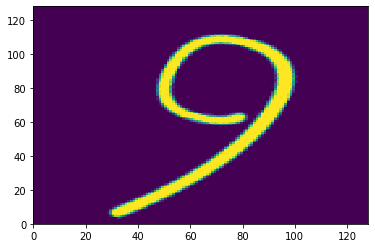

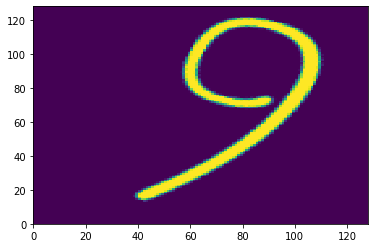

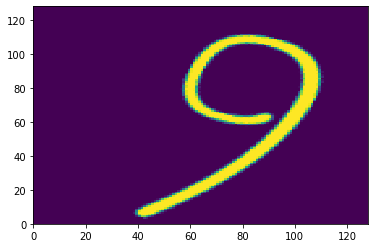

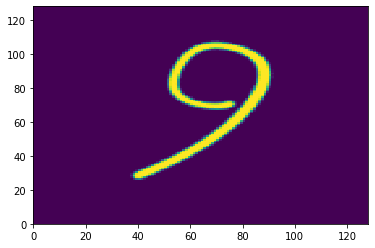

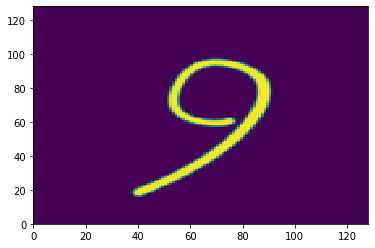

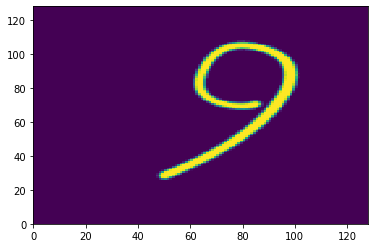

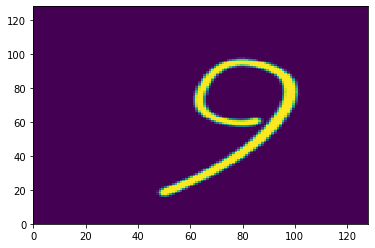

In [10]:
for i in range(ans.shape[0]):
    plt.pcolormesh(ans[i,:,:])
    plt.show()

In [11]:
with Image.open(test_image_path) as img:
    ans = img_t.augmentation([img])
print(ans.shape)

(1950, 128, 128)


In [12]:
del(ans)

# Data generation

In [163]:
# this controls which digits we are training
max_dig = 1
load_digits_list = list(range(max_dig))

In [164]:
load_digits_list = [4]

In [165]:
for digit in load_digits_list:
    img_arr = []
    for folder in data_path.iterdir():
        img_path = folder / (str(digit)+".png")
        img_arr.append(Image.open(img_path))

In [166]:
data = img_t.augmentation(img_arr)

In [167]:
data.shape
# (22932, 256, 256) old

(17550, 128, 128)

# FC network tests

In [18]:
total_elems = data.shape[1]*data.shape[2]

In [19]:
import torch
import torch.nn as nn

"""
Network Architectures
The following are the discriminator and generator architectures
"""

class discriminator(nn.Module):
    def __init__(self):
        super(discriminator, self).__init__()
        self.fc1 = nn.Linear(total_elems, 512)
        self.fc2 = nn.Linear(512, 1)
        self.activation = nn.LeakyReLU(0.1)

    def forward(self, x):
        x = x.view(-1, total_elems)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return nn.Sigmoid()(x)


class generator(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
        self.fc1 = nn.Linear(128, 1024)
        self.fc2 = nn.Linear(1024, 2048)
        self.fc3 = nn.Linear(2048, total_elems)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        x = x.view(-1, 1, 128, 128)
        return nn.Tanh()(x)

In [20]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import numpy as np
import matplotlib.pyplot as plt

In [21]:
"""
Determine if any GPUs are available
"""
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


"""
Hyperparameter settings
"""
epochs = 100
lr = 2e-4
batch_size = 64
loss = nn.BCELoss()

# Model
G = generator().to(device)
D = discriminator().to(device)

G_optimizer = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
D_optimizer = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))

In [22]:
train_set = torch.from_numpy(data)

In [23]:
train_set.shape

torch.Size([17550, 128, 128])

In [24]:
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)

Epoch 0 Iteration 100: discriminator_loss 0.303 generator_loss 1.996
Epoch 0 Iteration 200: discriminator_loss 0.311 generator_loss 1.123
Epoch 0 Iteration 275: discriminator_loss 0.238 generator_loss 2.743
Epoch 1 Iteration 100: discriminator_loss 0.332 generator_loss 1.923
Epoch 1 Iteration 200: discriminator_loss 0.387 generator_loss 1.637
Epoch 1 Iteration 275: discriminator_loss 0.165 generator_loss 1.858
Epoch 2 Iteration 100: discriminator_loss 0.268 generator_loss 2.024
Epoch 2 Iteration 200: discriminator_loss 0.369 generator_loss 2.304
Epoch 2 Iteration 275: discriminator_loss 0.351 generator_loss 3.138
Epoch 3 Iteration 100: discriminator_loss 0.258 generator_loss 2.807
Epoch 3 Iteration 200: discriminator_loss 0.337 generator_loss 2.078
Epoch 3 Iteration 275: discriminator_loss 0.364 generator_loss 0.737
Epoch 4 Iteration 100: discriminator_loss 0.326 generator_loss 1.480
Epoch 4 Iteration 200: discriminator_loss 0.296 generator_loss 2.085
Epoch 4 Iteration 275: discriminat

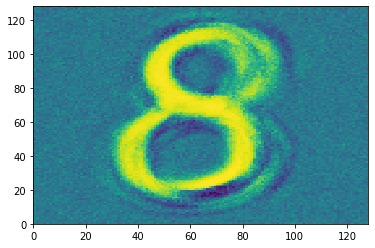

Model saved.
Epoch 10 Iteration 100: discriminator_loss 0.331 generator_loss 2.636
Epoch 10 Iteration 200: discriminator_loss 0.358 generator_loss 1.239
Epoch 10 Iteration 275: discriminator_loss 0.314 generator_loss 2.029
Epoch 11 Iteration 100: discriminator_loss 0.262 generator_loss 2.047
Epoch 11 Iteration 200: discriminator_loss 0.300 generator_loss 1.917
Epoch 11 Iteration 275: discriminator_loss 0.487 generator_loss 3.718
Epoch 12 Iteration 100: discriminator_loss 0.403 generator_loss 1.140
Epoch 12 Iteration 200: discriminator_loss 0.390 generator_loss 1.594
Epoch 12 Iteration 275: discriminator_loss 0.441 generator_loss 1.678
Epoch 13 Iteration 100: discriminator_loss 0.330 generator_loss 2.694
Epoch 13 Iteration 200: discriminator_loss 0.360 generator_loss 2.627
Epoch 13 Iteration 275: discriminator_loss 0.303 generator_loss 2.130
Epoch 14 Iteration 100: discriminator_loss 0.257 generator_loss 3.284
Epoch 14 Iteration 200: discriminator_loss 0.305 generator_loss 2.096
Epoch 1

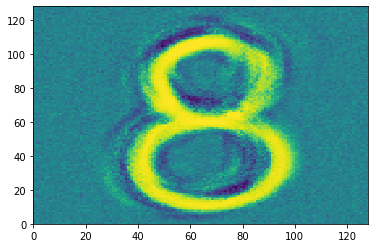

Model saved.
Epoch 20 Iteration 100: discriminator_loss 0.464 generator_loss 2.184
Epoch 20 Iteration 200: discriminator_loss 0.344 generator_loss 1.962
Epoch 20 Iteration 275: discriminator_loss 0.385 generator_loss 1.425
Epoch 21 Iteration 100: discriminator_loss 0.326 generator_loss 2.659
Epoch 21 Iteration 200: discriminator_loss 0.394 generator_loss 1.525
Epoch 21 Iteration 275: discriminator_loss 0.308 generator_loss 2.519
Epoch 22 Iteration 100: discriminator_loss 0.419 generator_loss 3.200
Epoch 22 Iteration 200: discriminator_loss 0.428 generator_loss 2.371
Epoch 22 Iteration 275: discriminator_loss 0.281 generator_loss 2.180
Epoch 23 Iteration 100: discriminator_loss 0.407 generator_loss 3.001
Epoch 23 Iteration 200: discriminator_loss 0.708 generator_loss 2.973
Epoch 23 Iteration 275: discriminator_loss 0.684 generator_loss 1.014
Epoch 24 Iteration 100: discriminator_loss 0.340 generator_loss 2.719
Epoch 24 Iteration 200: discriminator_loss 0.376 generator_loss 1.840
Epoch 2

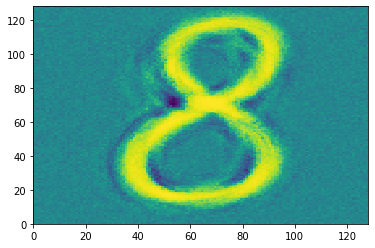

Model saved.
Epoch 30 Iteration 100: discriminator_loss 0.384 generator_loss 1.540
Epoch 30 Iteration 200: discriminator_loss 0.567 generator_loss 1.371
Epoch 30 Iteration 275: discriminator_loss 0.278 generator_loss 1.668
Epoch 31 Iteration 100: discriminator_loss 0.434 generator_loss 0.953
Epoch 31 Iteration 200: discriminator_loss 0.387 generator_loss 2.048
Epoch 31 Iteration 275: discriminator_loss 0.414 generator_loss 1.528
Epoch 32 Iteration 100: discriminator_loss 0.533 generator_loss 2.712
Epoch 32 Iteration 200: discriminator_loss 0.528 generator_loss 2.882
Epoch 32 Iteration 275: discriminator_loss 0.331 generator_loss 1.567
Epoch 33 Iteration 100: discriminator_loss 0.607 generator_loss 2.241
Epoch 33 Iteration 200: discriminator_loss 0.333 generator_loss 1.628
Epoch 33 Iteration 275: discriminator_loss 0.247 generator_loss 2.160
Epoch 34 Iteration 100: discriminator_loss 0.412 generator_loss 1.761
Epoch 34 Iteration 200: discriminator_loss 0.413 generator_loss 2.450
Epoch 3

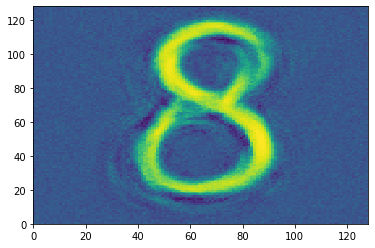

Model saved.
Epoch 40 Iteration 100: discriminator_loss 0.506 generator_loss 0.979
Epoch 40 Iteration 200: discriminator_loss 0.559 generator_loss 2.799
Epoch 40 Iteration 275: discriminator_loss 0.447 generator_loss 0.955
Epoch 41 Iteration 100: discriminator_loss 0.402 generator_loss 2.244
Epoch 41 Iteration 200: discriminator_loss 0.444 generator_loss 1.820
Epoch 41 Iteration 275: discriminator_loss 0.576 generator_loss 3.006
Epoch 42 Iteration 100: discriminator_loss 0.419 generator_loss 3.134
Epoch 42 Iteration 200: discriminator_loss 0.788 generator_loss 2.304
Epoch 42 Iteration 275: discriminator_loss 0.458 generator_loss 2.632
Epoch 43 Iteration 100: discriminator_loss 0.339 generator_loss 2.211
Epoch 43 Iteration 200: discriminator_loss 0.332 generator_loss 1.726
Epoch 43 Iteration 275: discriminator_loss 0.412 generator_loss 2.450
Epoch 44 Iteration 100: discriminator_loss 0.413 generator_loss 1.091
Epoch 44 Iteration 200: discriminator_loss 0.522 generator_loss 0.887
Epoch 4

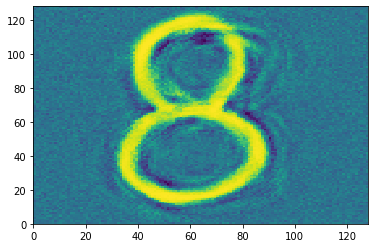

Model saved.
Epoch 50 Iteration 100: discriminator_loss 0.489 generator_loss 2.429
Epoch 50 Iteration 200: discriminator_loss 0.418 generator_loss 1.131
Epoch 50 Iteration 275: discriminator_loss 0.358 generator_loss 1.086
Epoch 51 Iteration 100: discriminator_loss 0.347 generator_loss 1.838
Epoch 51 Iteration 200: discriminator_loss 0.484 generator_loss 2.568
Epoch 51 Iteration 275: discriminator_loss 0.426 generator_loss 1.699
Epoch 52 Iteration 100: discriminator_loss 0.438 generator_loss 1.920
Epoch 52 Iteration 200: discriminator_loss 0.395 generator_loss 2.611
Epoch 52 Iteration 275: discriminator_loss 0.465 generator_loss 1.020
Epoch 53 Iteration 100: discriminator_loss 0.493 generator_loss 0.788
Epoch 53 Iteration 200: discriminator_loss 0.366 generator_loss 2.215
Epoch 53 Iteration 275: discriminator_loss 0.547 generator_loss 3.858
Epoch 54 Iteration 100: discriminator_loss 0.426 generator_loss 1.338
Epoch 54 Iteration 200: discriminator_loss 0.375 generator_loss 1.758
Epoch 5

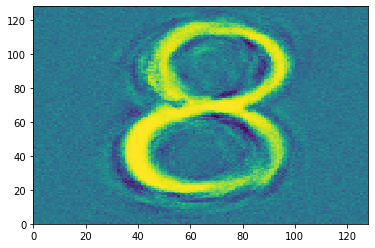

Model saved.
Epoch 60 Iteration 100: discriminator_loss 0.529 generator_loss 1.836
Epoch 60 Iteration 200: discriminator_loss 0.386 generator_loss 2.554
Epoch 60 Iteration 275: discriminator_loss 0.487 generator_loss 1.824
Epoch 61 Iteration 100: discriminator_loss 0.338 generator_loss 1.637
Epoch 61 Iteration 200: discriminator_loss 0.357 generator_loss 1.652
Epoch 61 Iteration 275: discriminator_loss 0.432 generator_loss 1.787
Epoch 62 Iteration 100: discriminator_loss 0.450 generator_loss 0.708
Epoch 62 Iteration 200: discriminator_loss 0.408 generator_loss 2.257
Epoch 62 Iteration 275: discriminator_loss 0.762 generator_loss 0.617
Epoch 63 Iteration 100: discriminator_loss 0.296 generator_loss 2.035
Epoch 63 Iteration 200: discriminator_loss 0.460 generator_loss 1.850
Epoch 63 Iteration 275: discriminator_loss 0.600 generator_loss 0.823
Epoch 64 Iteration 100: discriminator_loss 0.412 generator_loss 2.134
Epoch 64 Iteration 200: discriminator_loss 0.416 generator_loss 1.949
Epoch 6

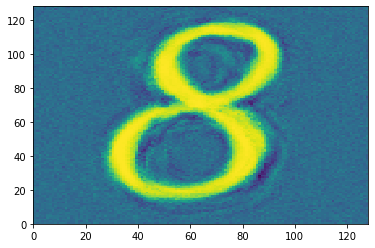

Model saved.
Epoch 70 Iteration 100: discriminator_loss 0.426 generator_loss 2.207
Epoch 70 Iteration 200: discriminator_loss 0.326 generator_loss 2.209
Epoch 70 Iteration 275: discriminator_loss 0.598 generator_loss 0.597
Epoch 71 Iteration 100: discriminator_loss 0.499 generator_loss 0.860
Epoch 71 Iteration 200: discriminator_loss 0.452 generator_loss 0.655
Epoch 71 Iteration 275: discriminator_loss 0.238 generator_loss 2.338
Epoch 72 Iteration 100: discriminator_loss 0.500 generator_loss 2.814
Epoch 72 Iteration 200: discriminator_loss 0.669 generator_loss 0.509
Epoch 72 Iteration 275: discriminator_loss 0.364 generator_loss 1.901
Epoch 73 Iteration 100: discriminator_loss 0.390 generator_loss 1.587
Epoch 73 Iteration 200: discriminator_loss 0.374 generator_loss 2.140
Epoch 73 Iteration 275: discriminator_loss 0.393 generator_loss 2.116
Epoch 74 Iteration 100: discriminator_loss 0.507 generator_loss 0.830
Epoch 74 Iteration 200: discriminator_loss 0.319 generator_loss 2.373
Epoch 7

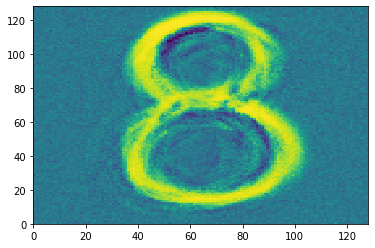

Model saved.
Epoch 80 Iteration 100: discriminator_loss 0.346 generator_loss 1.980
Epoch 80 Iteration 200: discriminator_loss 0.569 generator_loss 1.956
Epoch 80 Iteration 275: discriminator_loss 0.439 generator_loss 1.490
Epoch 81 Iteration 100: discriminator_loss 0.421 generator_loss 2.999
Epoch 81 Iteration 200: discriminator_loss 0.355 generator_loss 2.381
Epoch 81 Iteration 275: discriminator_loss 0.294 generator_loss 2.015
Epoch 82 Iteration 100: discriminator_loss 0.563 generator_loss 3.242
Epoch 82 Iteration 200: discriminator_loss 0.320 generator_loss 2.269
Epoch 82 Iteration 275: discriminator_loss 0.405 generator_loss 1.913
Epoch 83 Iteration 100: discriminator_loss 0.386 generator_loss 2.779
Epoch 83 Iteration 200: discriminator_loss 0.498 generator_loss 0.880
Epoch 83 Iteration 275: discriminator_loss 0.407 generator_loss 1.084
Epoch 84 Iteration 100: discriminator_loss 0.387 generator_loss 1.789
Epoch 84 Iteration 200: discriminator_loss 0.395 generator_loss 1.529
Epoch 8

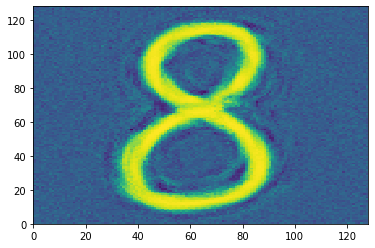

Model saved.
Epoch 90 Iteration 100: discriminator_loss 0.337 generator_loss 1.961
Epoch 90 Iteration 200: discriminator_loss 0.359 generator_loss 2.630
Epoch 90 Iteration 275: discriminator_loss 0.344 generator_loss 1.633
Epoch 91 Iteration 100: discriminator_loss 0.529 generator_loss 4.238
Epoch 91 Iteration 200: discriminator_loss 0.308 generator_loss 2.872
Epoch 91 Iteration 275: discriminator_loss 0.247 generator_loss 3.693
Epoch 92 Iteration 100: discriminator_loss 0.380 generator_loss 1.502
Epoch 92 Iteration 200: discriminator_loss 0.801 generator_loss 4.024
Epoch 92 Iteration 275: discriminator_loss 0.291 generator_loss 4.079
Epoch 93 Iteration 100: discriminator_loss 0.350 generator_loss 2.203
Epoch 93 Iteration 200: discriminator_loss 0.387 generator_loss 1.222
Epoch 93 Iteration 275: discriminator_loss 0.425 generator_loss 0.430
Epoch 94 Iteration 100: discriminator_loss 0.324 generator_loss 1.764
Epoch 94 Iteration 200: discriminator_loss 0.356 generator_loss 2.490
Epoch 9

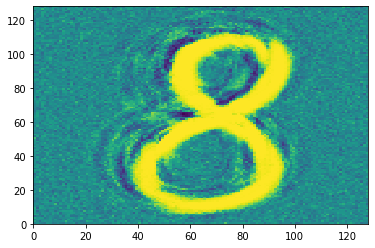

Model saved.


In [27]:
"""
Network training procedure
Every step both the loss for disciminator and generator is updated
Discriminator aims to classify reals and fakes
Generator aims to generate images as realistic as possible
"""
for epoch in range(epochs):
    for idx, imgs in enumerate(train_loader):
        idx += 1

        # Training the discriminator
        # Real inputs are actual images of the MNIST dataset
        # Fake inputs are from the generator
        # Real inputs should be classified as 1 and fake as 0
        real_inputs = imgs.to(device)
        real_outputs = D(real_inputs)
        real_label = torch.ones(real_inputs.shape[0], 1).to(device)

        noise = (torch.rand(real_inputs.shape[0], 128) - 0.5) / 0.5
        noise = noise.to(device)
        fake_inputs = G(noise)
        fake_outputs = D(fake_inputs)
        fake_label = torch.zeros(fake_inputs.shape[0], 1).to(device)

        outputs = torch.cat((real_outputs, fake_outputs), 0)
        targets = torch.cat((real_label, fake_label), 0)

        D_loss = loss(outputs, targets)
        D_optimizer.zero_grad()
        D_loss.backward()
        D_optimizer.step()

        # Training the generator
        # For generator, goal is to make the discriminator believe everything is 1
        noise = (torch.rand(real_inputs.shape[0], 128)-0.5)/0.5
        noise = noise.to(device)

        fake_inputs = G(noise)
        fake_outputs = D(fake_inputs)
        fake_targets = torch.ones([fake_inputs.shape[0], 1]).to(device)
        G_loss = loss(fake_outputs, fake_targets)
        G_optimizer.zero_grad()
        G_loss.backward()
        G_optimizer.step()

        if idx % 100 == 0 or idx == len(train_loader):
            print('Epoch {} Iteration {}: discriminator_loss {:.3f} generator_loss {:.3f}'.format(epoch, idx, D_loss.item(), G_loss.item()))

    if (epoch+1) % 10 == 0:
        torch.save(G, 'Generator_epoch_{}.pth'.format(epoch))
        tst = fake_inputs[0, 0, :, :]
        tst_cpu = tst.cpu()
        tst_cpu_np = tst_cpu.detach().numpy()
        plt.pcolormesh(tst_cpu_np)
        plt.show()
        print('Model saved.')

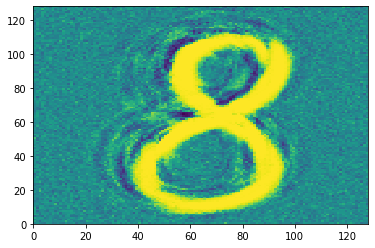

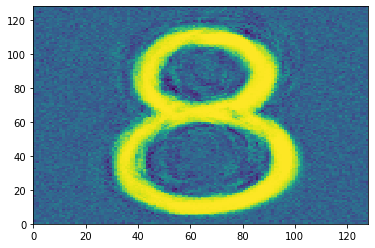

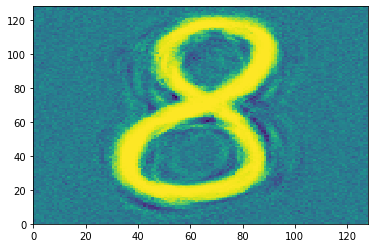

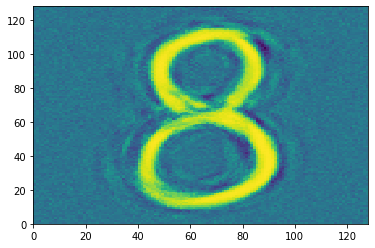

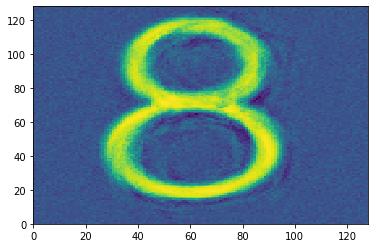

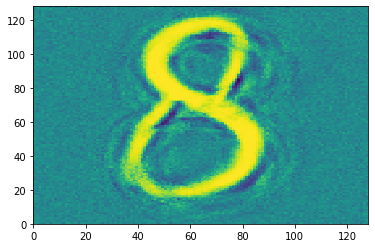

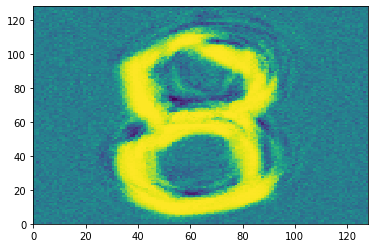

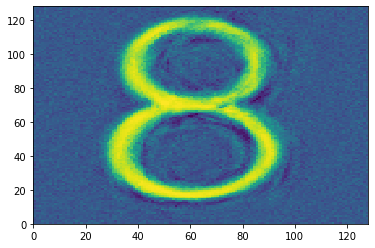

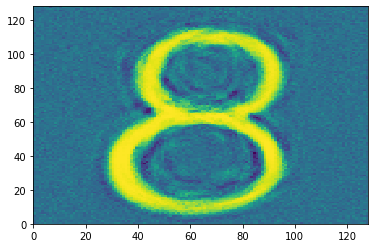

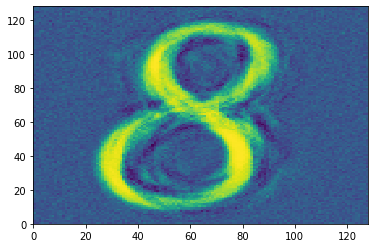

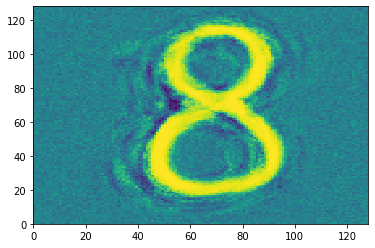

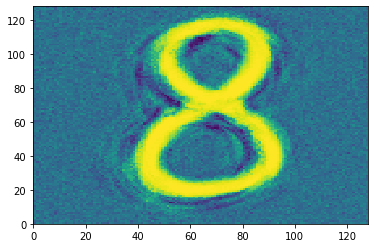

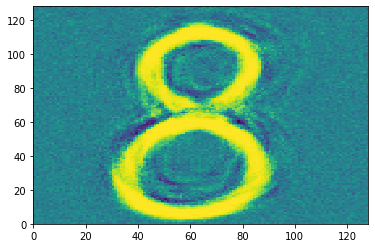

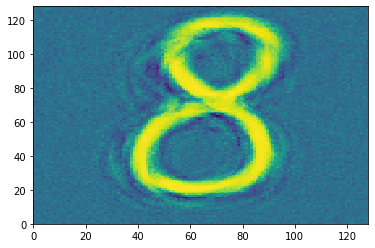

In [28]:
for i in range(fake_inputs.shape[0]):
    
    tst = fake_inputs[i, 0, :, :]
    tst_cpu = tst.cpu()
    tst_cpu_np = tst_cpu.detach().numpy()
    plt.pcolormesh(tst_cpu_np)
    plt.show()

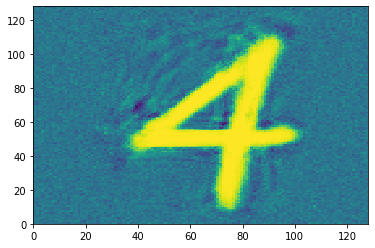

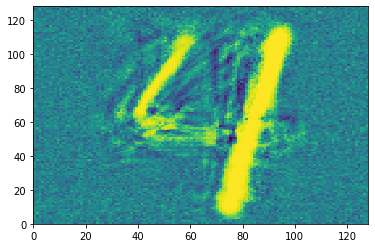

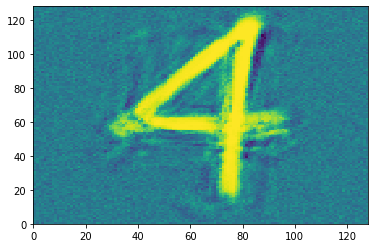

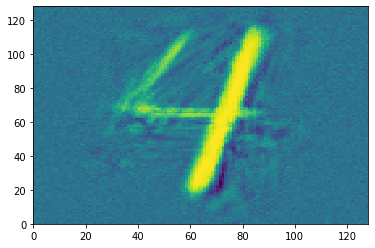

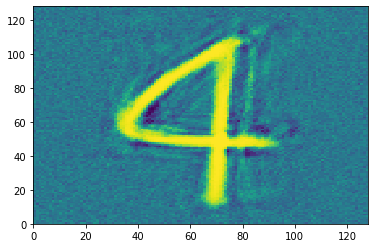

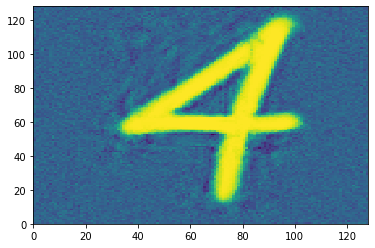

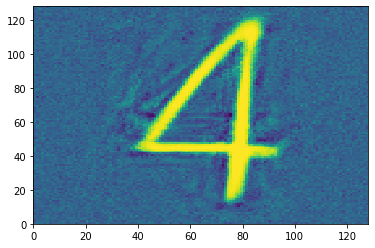

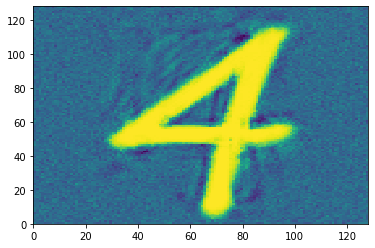

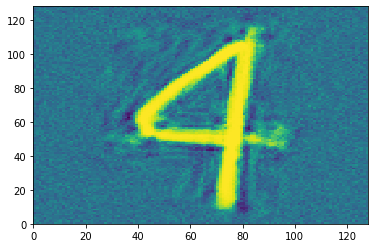

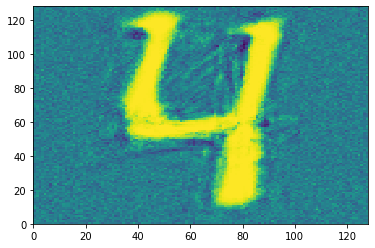

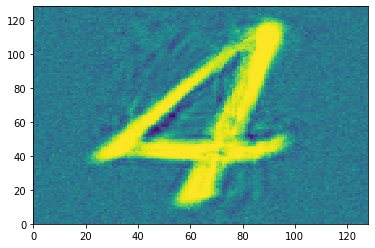

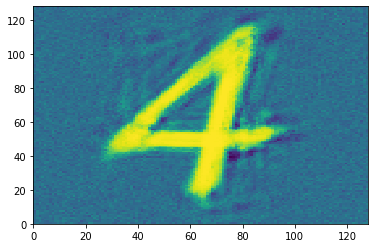

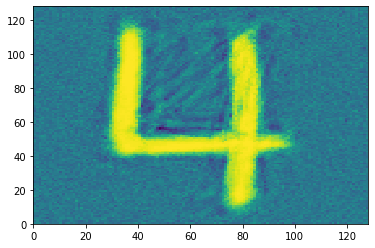

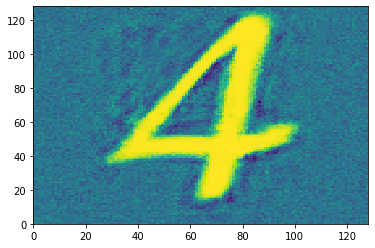

In [108]:
for i in range(fake_inputs.shape[0]):
    
    tst = fake_inputs[i, 0, :, :]
    tst_cpu = tst.cpu()
    tst_cpu_np = tst_cpu.detach().numpy()
    plt.pcolormesh(tst_cpu_np)
    plt.show()

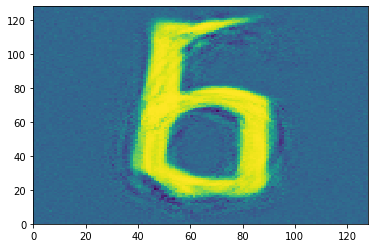

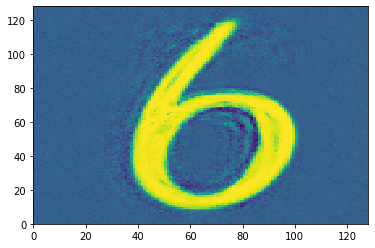

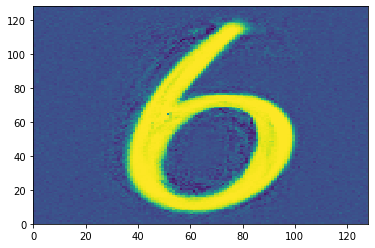

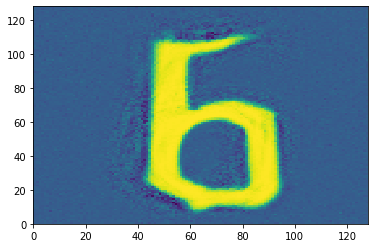

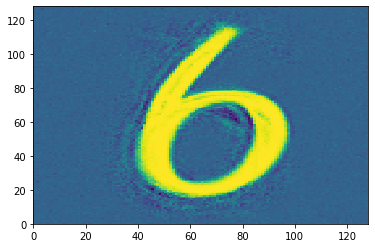

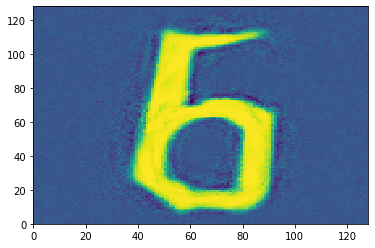

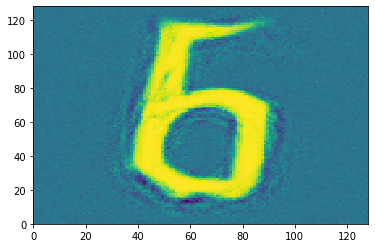

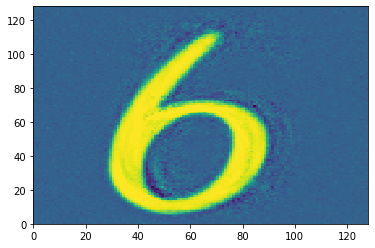

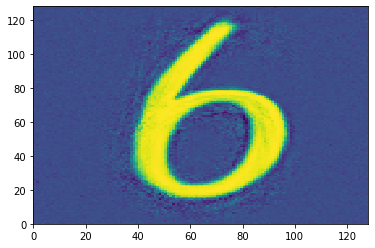

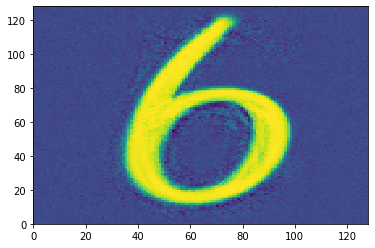

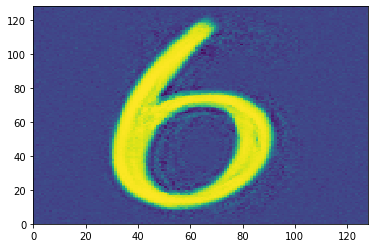

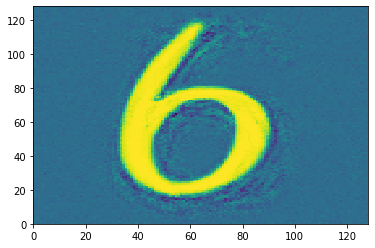

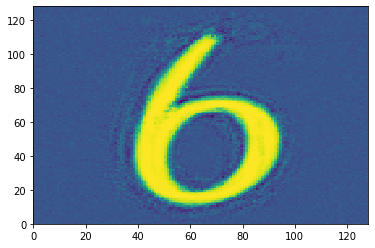

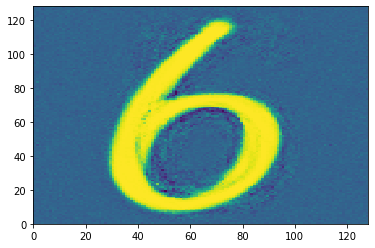

In [125]:
for i in range(fake_inputs.shape[0]):
    
    tst = fake_inputs[i, 0, :, :]
    tst_cpu = tst.cpu()
    tst_cpu_np = tst_cpu.detach().numpy()
    plt.pcolormesh(tst_cpu_np)
    plt.show()

# CNN pytorch

## data for pytorch

In [251]:
# this controls which digits we are training
max_dig = 1
load_digits_list = list(range(max_dig))

In [252]:
load_digits_list = [2]

In [253]:
for digit in load_digits_list:
    img_arr = []
    for folder in data_path.iterdir():
        img_path = folder / (str(digit)+".png")
        img_arr.append(Image.open(img_path))

In [254]:
data = img_t.augmentation(img_arr, mode="img")

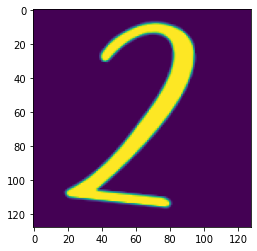

In [255]:
plt.imshow(data[100])

In [256]:
total_elems = len(data)
print(total_elems)

17550


In [257]:
type(data[0])

PIL.Image.Image

In [258]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [259]:
# Root directory for dataset
dataroot = "data/celeba"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64
# image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 1

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 40

# Learning rate for optimizers
lr = 0.0001 # 20-> 15

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

## data prep

In [260]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, image_size):
        super(MyDataset, self).__init__()
        self.dataset = dataset
        self.image_size = image_size
        self.transform=transforms.Compose([transforms.Resize(self.image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5), (0.5))])

    def __getitem__(self, idx):
        x = self.dataset[idx]
        return self.transform(x)
        
    def __len__(self):
        return len(self.dataset)

In [261]:
transform=transforms.Compose([transforms.Resize(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5), (0.5))])

In [262]:
train_set = MyDataset(data, image_size=image_size)
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

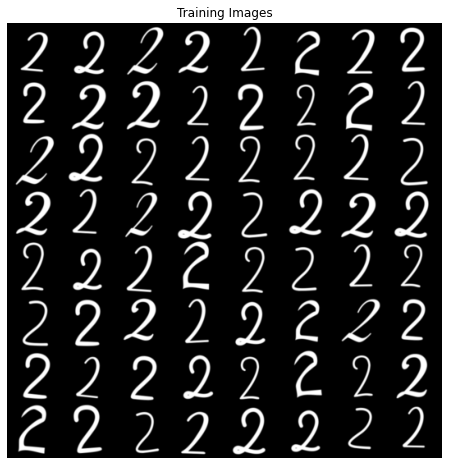

In [263]:
real_batch = next(iter(data_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[:64].to(device), padding=2, normalize=True).cpu(),(1,2,0)))

In [264]:
real_batch.shape

torch.Size([128, 1, 64, 64])

this should be deleted later!

end of old content!

In [265]:
# weight init to make all weights with mean=0, stdev=0.02
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

## Generator Code

In [266]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

In [267]:
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.02.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


# Discriminator Code

In [268]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [269]:
# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(weights_init)

# Print the model
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [270]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [271]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(data_loader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data.to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(data_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(data_loader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/40][0/138]	Loss_D: 1.5568	Loss_G: 2.0101	D(x): 0.4557	D(G(z)): 0.4254 / 0.1775
[0/40][50/138]	Loss_D: 0.0278	Loss_G: 7.0943	D(x): 0.9905	D(G(z)): 0.0177 / 0.0012
[0/40][100/138]	Loss_D: 0.0288	Loss_G: 8.7314	D(x): 0.9933	D(G(z)): 0.0212 / 0.0002
[1/40][0/138]	Loss_D: 0.0059	Loss_G: 8.0469	D(x): 0.9975	D(G(z)): 0.0034 / 0.0004
[1/40][50/138]	Loss_D: 0.0052	Loss_G: 7.8940	D(x): 0.9987	D(G(z)): 0.0039 / 0.0005
[1/40][100/138]	Loss_D: 0.0035	Loss_G: 7.8491	D(x): 0.9991	D(G(z)): 0.0025 / 0.0004
[2/40][0/138]	Loss_D: 0.0022	Loss_G: 8.0637	D(x): 0.9996	D(G(z)): 0.0018 / 0.0004
[2/40][50/138]	Loss_D: 0.0024	Loss_G: 7.7920	D(x): 0.9994	D(G(z)): 0.0018 / 0.0005
[2/40][100/138]	Loss_D: 0.0065	Loss_G: 7.4924	D(x): 0.9958	D(G(z)): 0.0022 / 0.0006
[3/40][0/138]	Loss_D: 0.0001	Loss_G: 41.4868	D(x): 0.9999	D(G(z)): 0.0000 / 0.0000
[3/40][50/138]	Loss_D: 0.0000	Loss_G: 41.5017	D(x): 1.0000	D(G(z)): 0.0000 / 0.0000
[3/40][100/138]	Loss_D: 0.0001	Loss_G: 41.4346	D(x): 0.9999	

[32/40][100/138]	Loss_D: 0.0047	Loss_G: 6.7512	D(x): 0.9969	D(G(z)): 0.0015 / 0.0012
[33/40][0/138]	Loss_D: 0.0030	Loss_G: 7.2897	D(x): 0.9978	D(G(z)): 0.0008 / 0.0007
[33/40][50/138]	Loss_D: 0.0034	Loss_G: 7.0445	D(x): 0.9981	D(G(z)): 0.0014 / 0.0009
[33/40][100/138]	Loss_D: 0.0039	Loss_G: 6.9886	D(x): 0.9981	D(G(z)): 0.0020 / 0.0009
[34/40][0/138]	Loss_D: 0.0081	Loss_G: 6.6804	D(x): 0.9941	D(G(z)): 0.0020 / 0.0013
[34/40][50/138]	Loss_D: 0.0048	Loss_G: 6.5173	D(x): 0.9984	D(G(z)): 0.0031 / 0.0015
[34/40][100/138]	Loss_D: 0.0012	Loss_G: 7.5913	D(x): 0.9996	D(G(z)): 0.0009 / 0.0005
[35/40][0/138]	Loss_D: 0.0012	Loss_G: 7.4452	D(x): 0.9997	D(G(z)): 0.0009 / 0.0006
[35/40][50/138]	Loss_D: 0.0013	Loss_G: 7.6430	D(x): 0.9994	D(G(z)): 0.0007 / 0.0005
[35/40][100/138]	Loss_D: 0.0065	Loss_G: 6.4300	D(x): 0.9960	D(G(z)): 0.0024 / 0.0016
[36/40][0/138]	Loss_D: 0.0020	Loss_G: 7.1777	D(x): 0.9991	D(G(z)): 0.0011 / 0.0008
[36/40][50/138]	Loss_D: 0.0028	Loss_G: 7.0034	D(x): 0.9986	D(G(z)): 0.0014 /

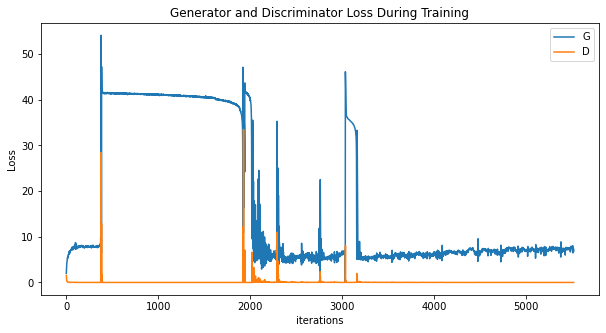

In [272]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

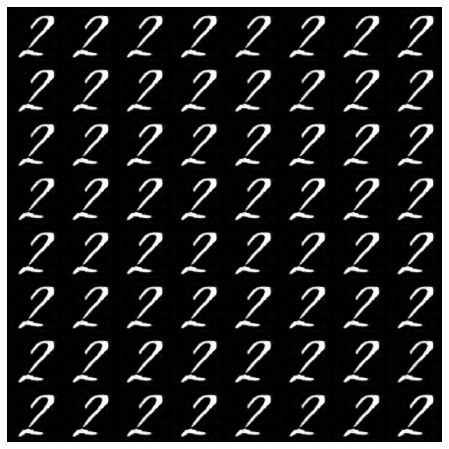

In [273]:
#%%capture
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

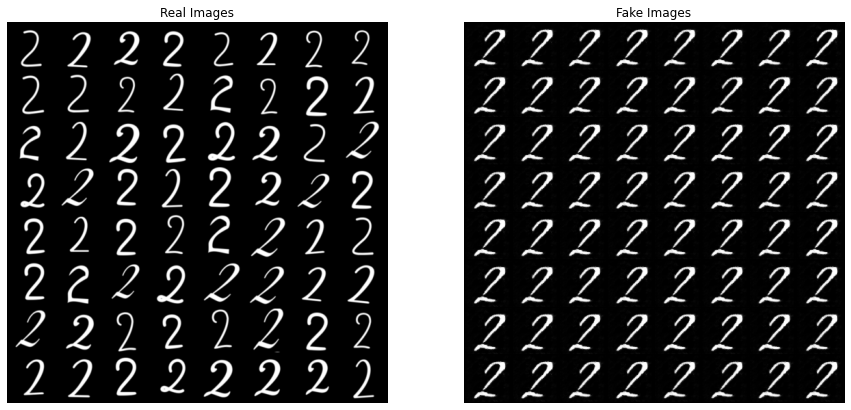

In [274]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(data_loader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch.to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()